In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import cufflinks as cf
cf.go_offline()
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [18]:
import sklearn.datasets as sd
import sklearn.utils as su
import sklearn.metrics as sm
import sklearn.model_selection as ms
import sklearn.preprocessing as sp
import sklearn.ensemble as se
import sklearn.linear_model as lm
import sklearn.pipeline as pl
import sklearn.tree as st

In [4]:
data = pd.read_csv('bike_day.csv')
data = data.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)
data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,8714.000000


In [5]:
data.iplot(x='temp', y='cnt', mode='markers', size=5)

In [6]:
data.iplot(x='windspeed', y='cnt', mode='markers', size=5)

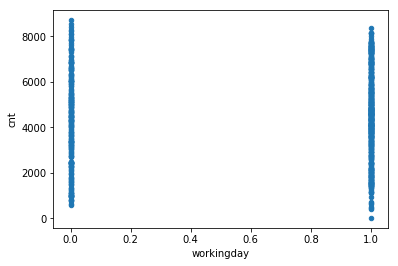

In [7]:
data.plot.scatter(x='workingday', y='cnt')

In [8]:
X = data.drop('cnt', axis=1)
y = data['cnt']

X_train, X_test, y_train, y_test = ms.train_test_split(X,
                                                       y,
                                                       test_size=0.1,
                                                       random_state=7)

In [37]:
model = se.GradientBoostingRegressor(n_estimators=500,
                                     max_depth=5,
                                     min_samples_split=3)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(sm.r2_score(y_test, predictions))

0.8936604191096534


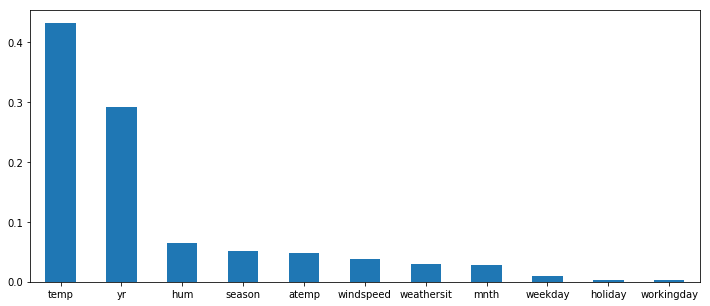

In [38]:
plt.figure(figsize=(12, 5))
fi = model.feature_importances_
fi = pd.Series(fi, index=X.columns)
fi.sort_values(ascending=False).plot.bar(rot=0)